# **Setup**
Book: Short Stories of Various Types</br>
Short Story Title: The Gift of the Magi by O. Henry</br>
Source: https://www.gutenberg.org/cache/epub/64317/pg64317.txt

In [1]:
from collections import Counter
import pandas as pd
import numpy as np
import nltk
from nltk import sent_tokenize, word_tokenize, FreqDist
from nltk.corpus import stopwords
stopwords_en = stopwords.words('english');
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer();
from string import punctuation
import re
from wordcloud import WordCloud
from gensim import corpora
import gensim
Lda = gensim.models.ldamodel.LdaModel
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import mglearn
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

filePath = "data/ShortStory.txt";

# **Content Analysis**
Reference: https://www.geeksforgeeks.org/text-analysis-in-python-3/

## Word Frequency in Text

In [2]:
def count_words(text):
    skips = [".",", ",":",";"];
    for ch in skips:
        text = text.replace(ch, "");
    word_counts = Counter(text.split(" "));
    return word_counts;

# text = "This is my test text. We're keeping this text short to keep things manageable."
# text = text.lower()
# count_words(text)

In [3]:
def read_book(title_path):
    with open(title_path, "r", encoding="utf8") as current_file:
        text = current_file.read();
        text = text.replace("\n","").replace("\r","");
    return text;

# read_book("ShortStory.txt")

In [4]:
def word_stats(word_counts):
    num_unique = len(word_counts);
    counts = word_counts.values();
    return (num_unique, counts);

text = read_book(filePath);
word_counts = count_words(text);
(num_unique, counts) = word_stats(word_counts);
print(num_unique, sum(counts));

900 1794


## Text Extraction & Pre-Processing
References:</br>
https://www.youtube.com/watch?v=7WfoYl-EPtI&list=LL&index=7</br>
https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0</br>
https://www.geeksforgeeks.org/python-lemmatization-with-nltk/?ref=lbp</br>
https://datagy.io/python-remove-punctuation-from-string/</br>
https://stackoverflow.com/questions/354038/how-do-i-check-if-a-string-is-a-number-float</br>

In [5]:
def proccess_text_for_NLP(text):
    single_tokenized_lowered = list(map(str.lower, word_tokenize(text)));
    stopwords_en = set(stopwords.words('english'));
    stopwords_en_withpunct = stopwords_en.union(set(punctuation));
    single_tokenized_lowered_nopunct = [word for word in single_tokenized_lowered if word not in stopwords_en_withpunct];
    # for word in single_tokenized_lowered_nopunct:
    #     word = re.sub("[,\.!?'`-]","", word);
    #     word = lemmatizer.lemmatize(word, pos="a");
    # textNLP = ','.join(single_tokenized_lowered_nopunct);
    textNLP_list = [];
    for word in single_tokenized_lowered_nopunct:
        if (word.isdigit() == False) & (word != "``") & (word != "''") & (word != ""):
            word = re.sub("[,\.!?'`-]","", word);
            word = re.sub(r'[^\w\s]','', word);
            word = lemmatizer.lemmatize(word, pos="a");
            # if word != "s":
            if word not in ["s","","nt","said"]:
                textNLP_list.append(word);
    textNLP = ','.join(textNLP_list);
    return textNLP;

<>:13: DeprecationWarning: invalid escape sequence '\.'
<>:13: DeprecationWarning: invalid escape sequence '\.'
C:\Users\kunal\AppData\Local\Temp/ipykernel_13132/204184403.py:13: DeprecationWarning: invalid escape sequence '\.'
  word = re.sub("[,\.!?'`-]","", word);


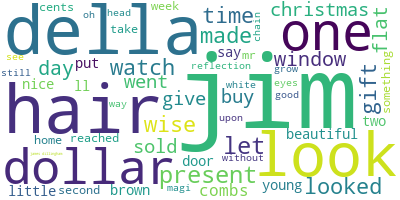

In [6]:
textNLP = proccess_text_for_NLP(text)

wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

wordcloud.generate(textNLP)

wordcloud.to_image()

## Topic Modelling
References:</br>
https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0</br>
https://www.analyticsvidhya.com/blog/2016/08/beginners-guide-to-topic-modeling-in-python/</br>
https://stackoverflow.com/questions/33229360/gensim-typeerror-doc2bow-expects-an-array-of-unicode-tokens-on-input-not-a-si</br>
https://towardsdatascience.com/nlp-for-topic-modeling-summarization-of-legal-documents-8c89393b1534</br>
https://github.com/chibueze-oguejiofor/Machine-Learning-In-Law/blob/master/project.ipynb</br>

In [7]:
num_topics = 5;
num_words= 10;

### *Attempt 1*

In [8]:
dictionary = corpora.Dictionary([textNLP.split(",")]);
doc_term_matrix = [dictionary.doc2bow(doc) for doc in [textNLP.split(",")]];

In [9]:
ldamodel = Lda(corpus=doc_term_matrix, num_topics=num_topics, id2word = dictionary);

ldamodel.print_topics(num_topics=num_topics, num_words=num_words)

[(0,
  '0.008*"jim" + 0.006*"della" + 0.005*"hair" + 0.004*"look" + 0.004*"let" + 0.004*"wise" + 0.004*"present" + 0.004*"could" + 0.004*"little" + 0.003*"buy"'),
 (1,
  '0.008*"jim" + 0.006*"della" + 0.005*"look" + 0.004*"like" + 0.004*"wise" + 0.004*"hair" + 0.004*"could" + 0.003*"one" + 0.003*"let" + 0.003*"made"'),
 (2,
  '0.016*"jim" + 0.012*"hair" + 0.011*"della" + 0.006*"like" + 0.006*"could" + 0.006*"one" + 0.005*"looked" + 0.005*"watch" + 0.005*"made" + 0.005*"look"'),
 (3,
  '0.014*"jim" + 0.009*"hair" + 0.008*"della" + 0.006*"look" + 0.005*"let" + 0.005*"one" + 0.004*"went" + 0.004*"flat" + 0.004*"like" + 0.004*"could"'),
 (4,
  '0.010*"jim" + 0.009*"della" + 0.006*"hair" + 0.005*"look" + 0.005*"let" + 0.005*"could" + 0.005*"one" + 0.004*"wise" + 0.004*"made" + 0.004*"looked"')]

### *Attempt 2*

In [10]:
vect = CountVectorizer(ngram_range=(1,1), stop_words='english');
dtm=vect.fit_transform(textNLP.split(","))
pd.DataFrame(dtm.toarray(), columns=vect.get_feature_names_out())

,131,187,8per,able,account,accurate,added,adornments,agile,ai,...,wriggled,wrong,year,yearned,yer,youhave,youmay,youmaybe,young,youngs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
lda = LatentDirichletAllocation(n_components=5);
lda.fit_transform(dtm);

In [12]:
sorting = np.argsort(lda.components_)[:,::-1];
features = np.array(vect.get_feature_names_out());

In [13]:
mglearn.tools.print_topics(topics=range(num_topics), feature_names=features, sorting=sorting, topics_per_chunk=num_topics, n_words=num_words)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
present       let           like          jim           look          
ll            went          christmas     della         looked        
window        dillingham    flat          hair          gifts         
week          combs         sold          wise          door          
love          little        time          watch         nice          
pierglass     brown         day           buy           home          
bearing       eyes          chain         beautiful     dollar        
away          cents         head          dollars       oh            
room          white         young         say           package       
chops         reached       way           magi          dell          




In [14]:
zit=pyLDAvis.sklearn.prepare(lda,dtm,vect)

c:\Users\kunal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
c:\Users\kunal\AppData\Local\Programs\Python\Python310\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [15]:
pyLDAvis.display(zit)